In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv('DDOS attack-LOIC-UDP.csv')

In [13]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,17,114000070,11,0,352,0.0,32,32,32.0,...,8,4000007.000,0.00,4000007.0,4000007.0,13800000.0,4.335167e+06,23000000.0,8999997.0,Benign
1,80,17,118031920,15,0,480,0.0,32,32,32.0,...,8,5334643.667,4507412.57,10000000.0,1003910.0,11300000.0,1.200000e+07,42000000.0,5004033.0,Benign
2,80,6,93,2,0,0,0.0,0,0,0.0,...,20,0.000,0.00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
3,53,17,284,1,1,41,57.0,41,41,41.0,...,8,0.000,0.00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
4,53,17,1295,1,1,36,97.0,36,36,36.0,...,8,0.000,0.00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign


In [5]:
df.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           5784 non-null   int64  
 1   Protocol           5784 non-null   int64  
 2   Flow Duration      5784 non-null   int64  
 3   Tot Fwd Pkts       5784 non-null   int64  
 4   Tot Bwd Pkts       5784 non-null   int64  
 5   TotLen Fwd Pkts    5784 non-null   int64  
 6   TotLen Bwd Pkts    5784 non-null   float64
 7   Fwd Pkt Len Max    5784 non-null   int64  
 8   Fwd Pkt Len Min    5784 non-null   int64  
 9   Fwd Pkt Len Mean   5784 non-null   float64
 10  Fwd Pkt Len Std    5784 non-null   float64
 11  Bwd Pkt Len Max    5784 non-null   int64  
 12  Bwd Pkt Len Min    5784 non-null   int64  
 13  Bwd Pkt Len Mean   5784 non-null   float64
 14  Bwd Pkt Len Std    5784 non-null   float64
 15  Flow Byts/s        5784 non-null   int64  
 16  Flow Pkts/s        5784 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dst Port,5784.0,1.005824e+04,1.999004e+04,0.0,80.00,80.0,3389.0,65514.0
Protocol,5784.0,1.126037e+01,5.582821e+00,0.0,6.00,6.0,17.0,17.0
Flow Duration,5784.0,4.462386e+07,5.472007e+07,0.0,1298.75,3947304.5,119593336.0,119999998.0
Tot Fwd Pkts,5784.0,3.510537e+04,5.591267e+04,1.0,2.00,5.0,94932.5,309629.0
Tot Bwd Pkts,5784.0,7.203492e+00,1.496943e+02,0.0,0.00,1.0,3.0,5741.0
...,...,...,...,...,...,...,...,...
Active Min,5784.0,4.616824e+04,1.092335e+06,0.0,0.00,0.0,0.0,77300000.0
Idle Mean,5784.0,4.027461e+06,1.569994e+07,0.0,0.00,0.0,0.0,104431205.0
Idle Std,5784.0,1.078240e+05,1.370668e+06,0.0,0.00,0.0,0.0,32500000.0
Idle Max,5784.0,4.123941e+06,1.589625e+07,0.0,0.00,0.0,0.0,104431205.0


In [8]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


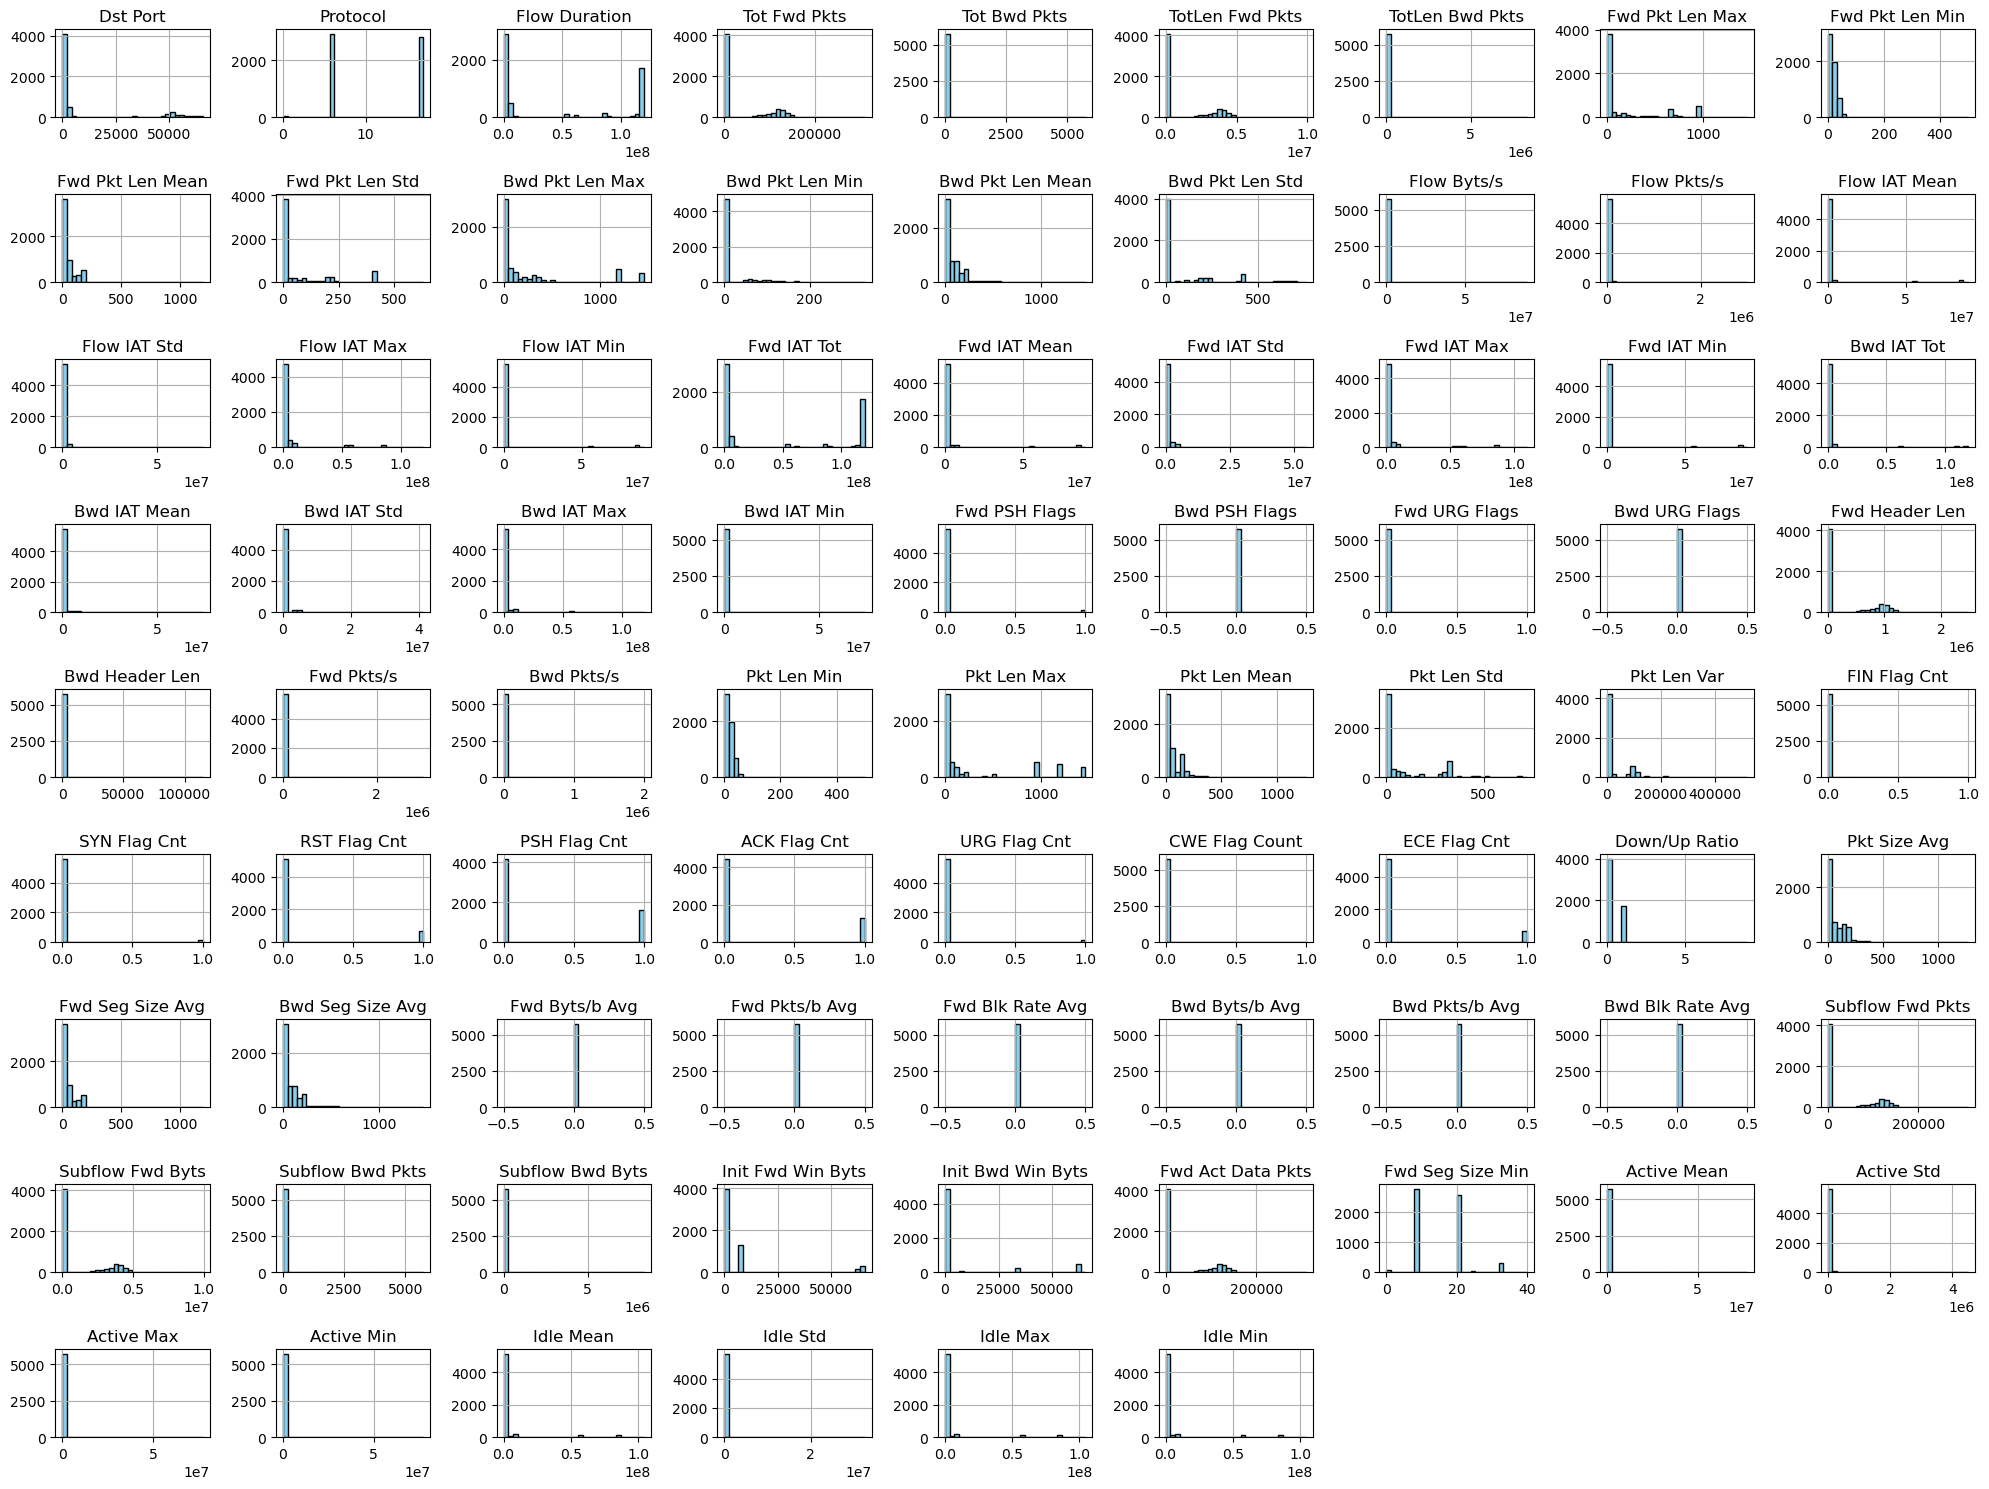

In [9]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Histograms for all numeric columns
df[numeric_columns].hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

Label
Benign                  4054
DDOS attack-LOIC-UDP    1730
Name: count, dtype: int64


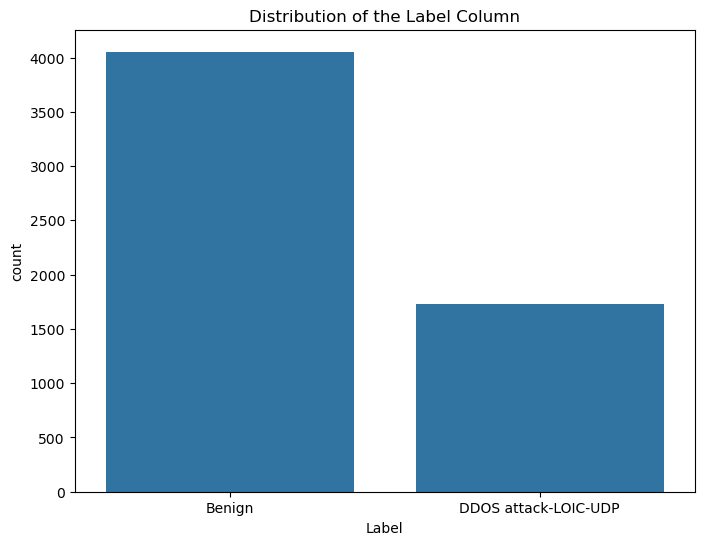

In [10]:
print(df['Label'].value_counts())

# Visualize the count of each class in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of the Label Column')
plt.show()

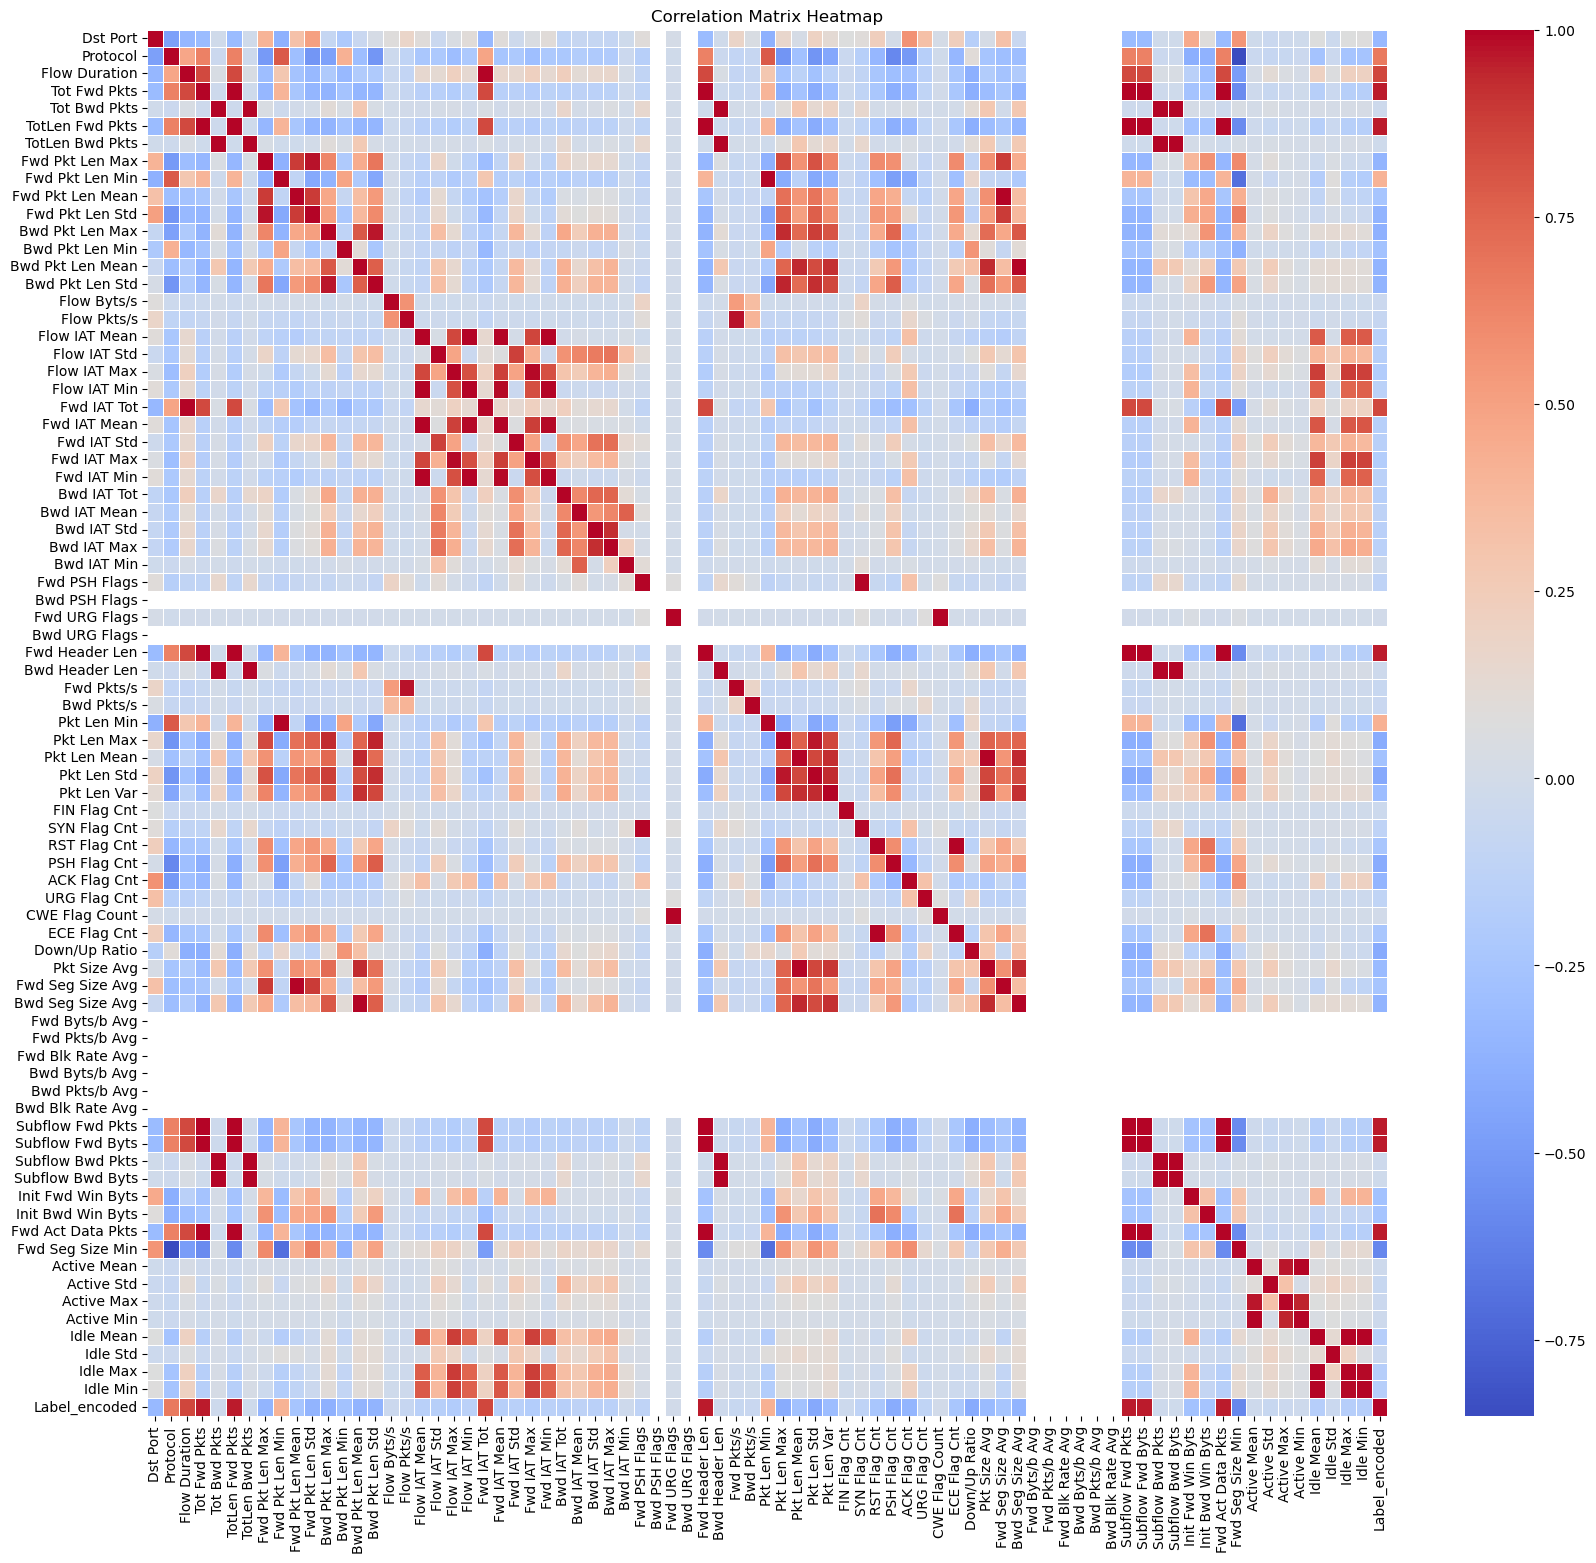

In [11]:
from sklearn.preprocessing import LabelEncoder
# Compute the correlation matrix
df1 = df.copy(deep=True)

# Encode the 'Label' column in df1
label_encoder = LabelEncoder()
df1['Label_encoded'] = label_encoder.fit_transform(df1['Label'])

# Drop non-numeric columns
df1_numeric = df1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df1_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [12]:
# Display the features most correlated with the encoded 'Label' column
correlation_with_label = correlation_matrix['Label_encoded'].sort_values(ascending=False)
print("Top 10 features most positively correlated with the Label:")
print(correlation_with_label.head(10))

Top 10 features most positively correlated with the Label:
Label_encoded        1.000000
Fwd Act Data Pkts    0.961004
Tot Fwd Pkts         0.961000
Subflow Fwd Pkts     0.961000
Subflow Fwd Byts     0.960997
TotLen Fwd Pkts      0.960997
Fwd Header Len       0.960987
Fwd IAT Tot          0.854294
Flow Duration        0.852385
Protocol             0.671659
Name: Label_encoded, dtype: float64


In [13]:

print("\nTop 10 features most negatively correlated with the Label:")
print(correlation_with_label.tail(10))


Top 10 features most negatively correlated with the Label:
Pkt Len Std        -0.422384
Fwd Seg Size Min   -0.597832
Bwd PSH Flags            NaN
Bwd URG Flags            NaN
Fwd Byts/b Avg           NaN
Fwd Pkts/b Avg           NaN
Fwd Blk Rate Avg         NaN
Bwd Byts/b Avg           NaN
Bwd Pkts/b Avg           NaN
Bwd Blk Rate Avg         NaN
Name: Label_encoded, dtype: float64


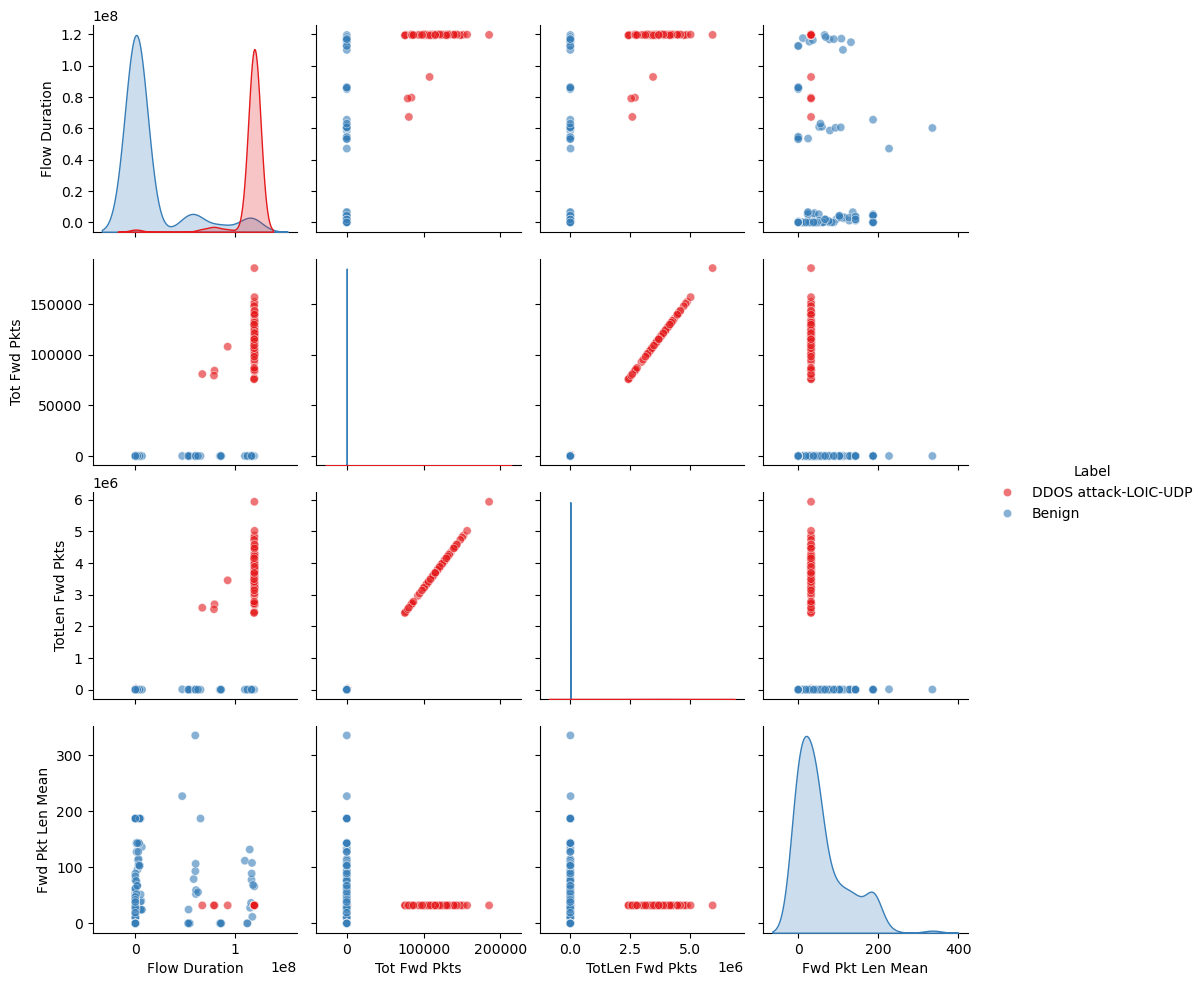

In [14]:
# Sample data to avoid heavy computation
sample_df = df.sample(frac=0.05, random_state=42)

# Select a few features to visualize relationships
selected_features = ['Flow Duration', 'Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Mean', 'Label']

# Plot pairplot
sns.pairplot(sample_df[selected_features], hue='Label', palette='Set1', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()


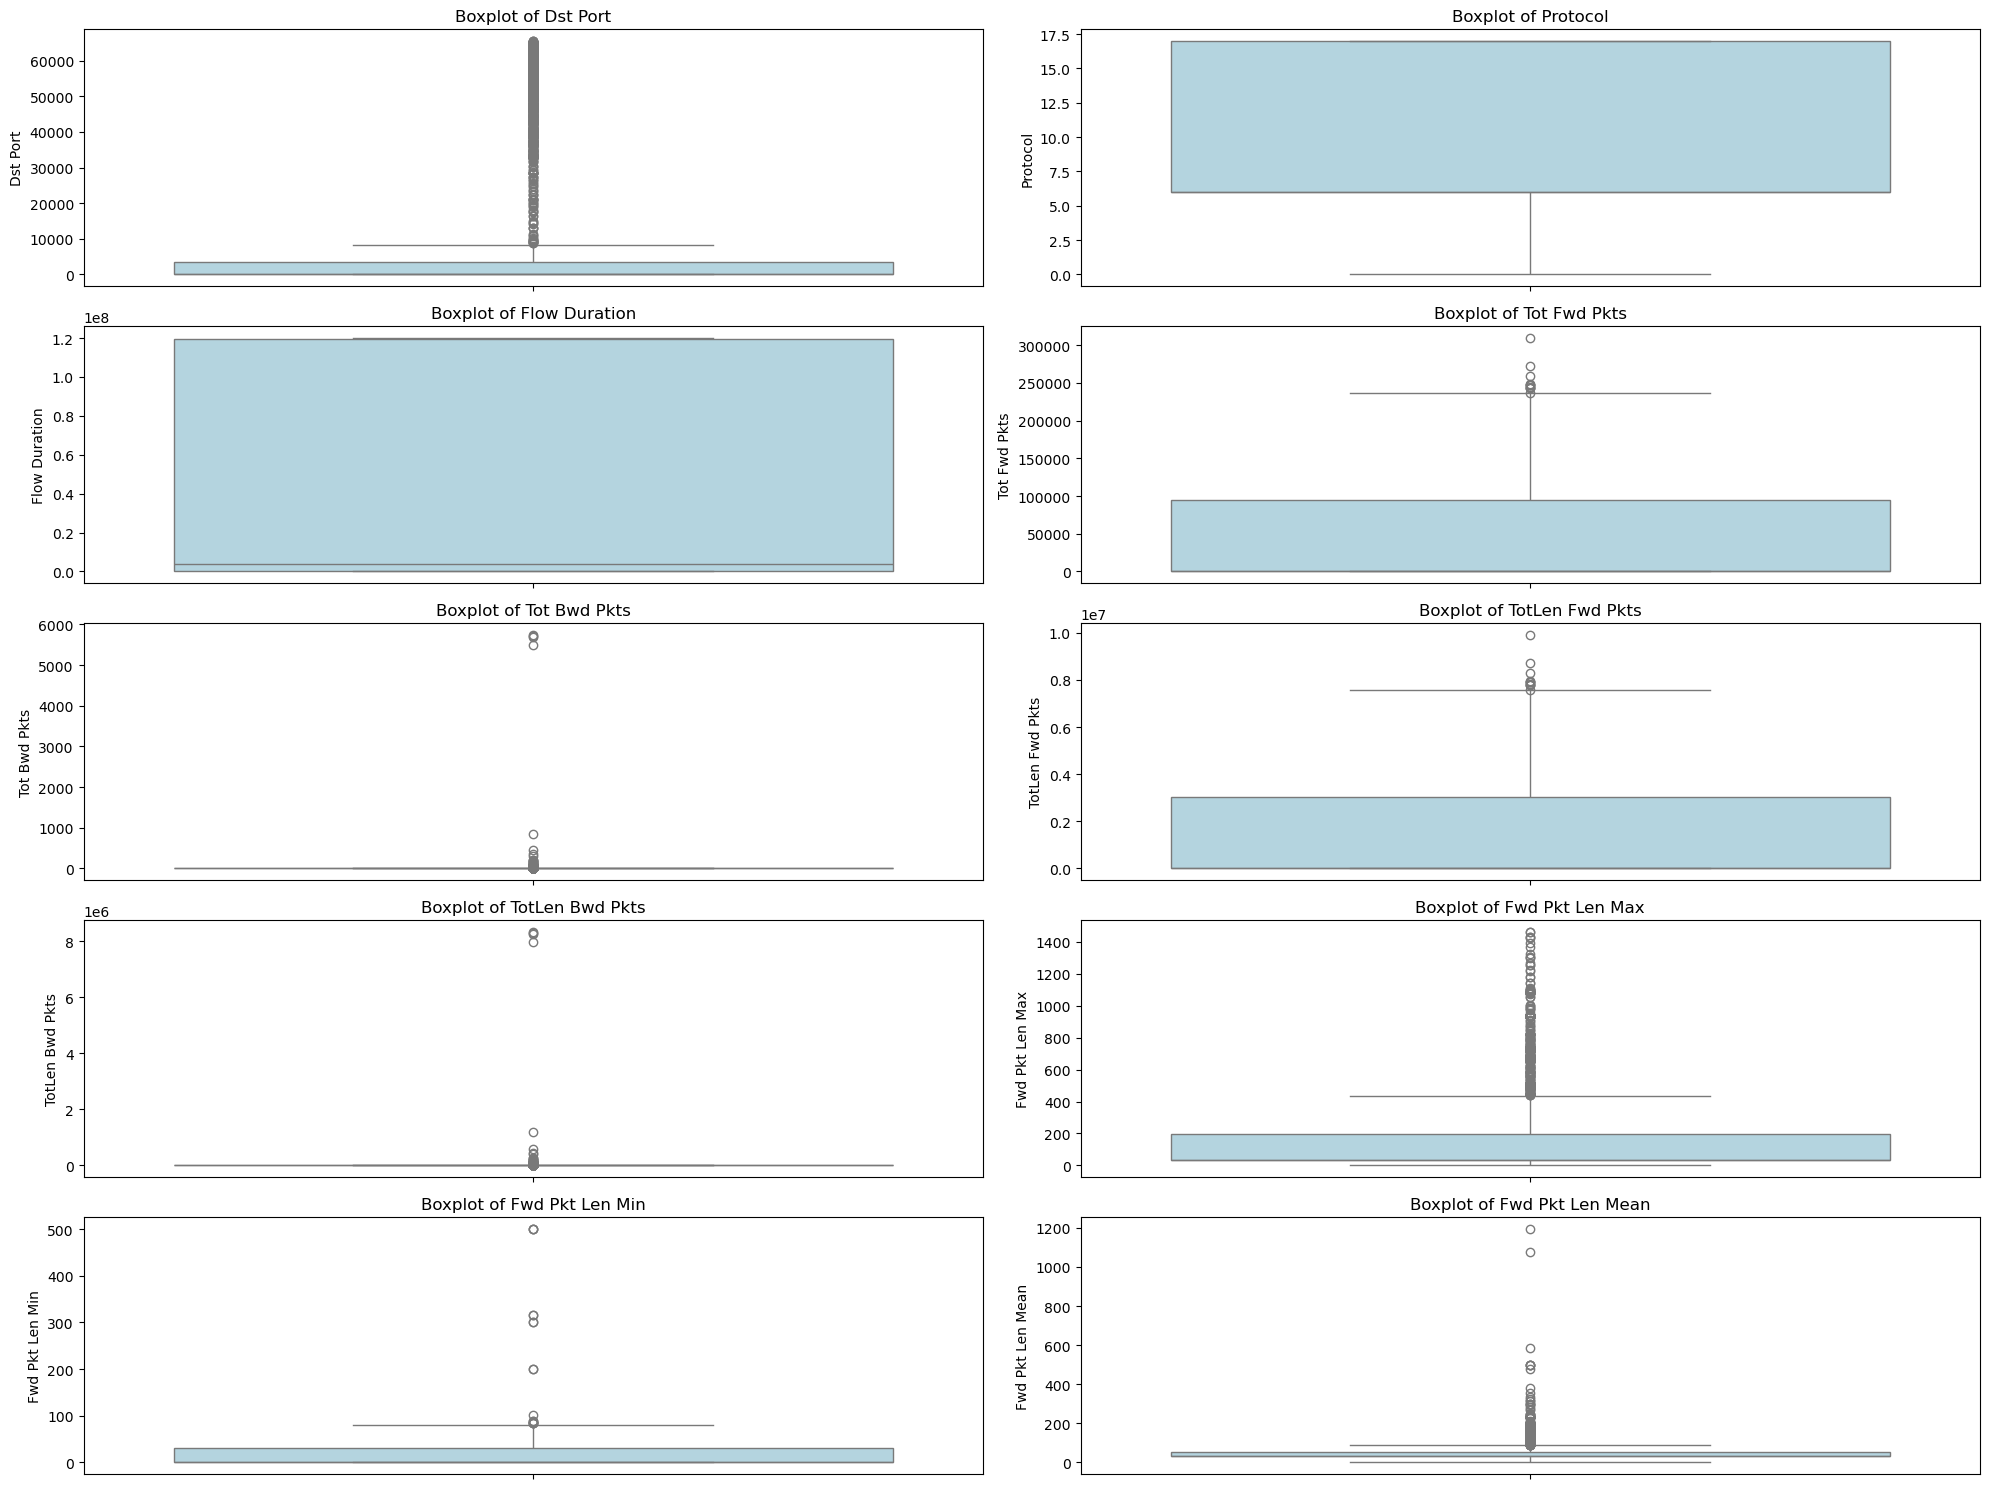

In [15]:
# Plot boxplots to detect outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns[:10], 1):  # Visualize only the first 10 numeric columns
    plt.subplot(5, 2, i)
    sns.boxplot(y=column, data=df, color='lightblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [16]:
# Get categorical columns (excluding 'Label')
categorical_columns = df.select_dtypes(include='object').columns.drop('Label')

# Visualize count plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Count plot of {column}')
    plt.show()


# Feature Extraction

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

In [15]:
# Encode target variable if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for LDA and autoencoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest for feature extraction

Top 25 important features:
Fwd Header Len: 0.11735201051172092
Subflow Fwd Pkts: 0.11580892014471003
TotLen Fwd Pkts: 0.10652000662111959
Subflow Fwd Byts: 0.09956393839809881
Fwd Act Data Pkts: 0.09813599178584782
Tot Fwd Pkts: 0.08572350998279166
Fwd IAT Tot: 0.06255696029032248
Fwd Pkt Len Min: 0.03205339703978912
Bwd Pkts/s: 0.026602031602808992
Pkt Len Min: 0.024982300573679467
Flow IAT Min: 0.020382199098452333
Subflow Bwd Pkts: 0.01880484194525364
Pkt Len Mean: 0.018460189732932425
Tot Bwd Pkts: 0.015796811911685187
Fwd IAT Std: 0.014378402198245897
Protocol: 0.013903714701113188
Bwd Pkt Len Mean: 0.013128180636150464
Pkt Len Std: 0.00997226869378892
Pkt Len Var: 0.009657675355881475
Fwd IAT Max: 0.009250623488588466
Bwd Pkt Len Max: 0.009125057415586203
Init Fwd Win Byts: 0.00872513678676112
Fwd Pkt Len Mean: 0.008645133335623731
Flow Duration: 0.008493787308123064
Fwd IAT Min: 0.00796775632805521


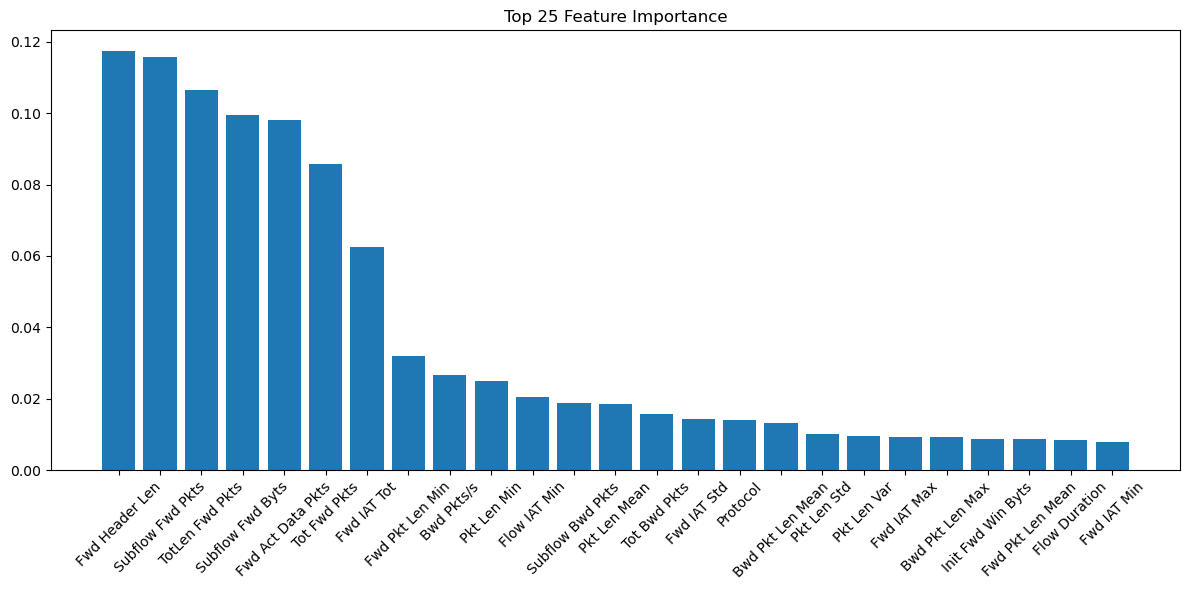

In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 25 important features
print("Top 25 important features:")
for i in range(25):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

# Plot feature importances for the top 25 features
plt.figure(figsize=(12, 6))
plt.title("Top 25 Feature Importance")
plt.bar(range(25), importances[indices[:25]], align='center')  # Adjusted to 25
plt.xticks(range(25), X.columns[indices[:25]], rotation=45)  # Adjusted to 25
plt.tight_layout()
plt.show()


## Recursive Feature Elimination (RFE)

In [7]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder

# # Example data preprocessing
# # Check if there are categorical variables and encode them
# for col in X_train.columns:
#     if X_train[col].dtype == 'object':
#         le = LabelEncoder()
#         X_train[col] = le.fit_transform(X_train[col])
#         X_test[col] = le.transform(X_test[col])

# # RFE with Random Forest as the estimator
# rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), n_features_to_select=25)
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = X_train.columns[rfe.support_]
# print("Selected features by RFE:")
# print(selected_features)

# # Create a DataFrame to visualize feature rankings
# feature_ranking = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Rank': rfe.ranking_
# })

# # Sort the features based on their rank
# feature_ranking = feature_ranking.sort_values(by='Rank')

# # Plot the top features
# plt.figure(figsize=(12, 6))
# plt.barh(feature_ranking['Feature'], feature_ranking['Rank'], color='skyblue')
# plt.title("Feature Rankings from RFE with Random Forest")
# plt.xlabel("Rank")
# plt.ylabel("Features")
# plt.gca().invert_yaxis()  # Invert y-axis to have the highest rank at the top
# plt.tight_layout()
# plt.show()

# Autoencoder

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_scaled is already defined
input_dim = X_train_scaled.shape[1]
encoding_dim = 20  # Adjust this as needed

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with fewer epochs and early stopping
autoencoder.fit(X_train_scaled, X_train_scaled, 
                epochs=50,              # You can reduce this further for testing
                batch_size=128,         # Adjusted batch size for potentially faster training
                validation_split=0.2, 
                callbacks=[early_stopping],  # Use early stopping
                verbose=1)

# Extract the encoder part
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Get the weights of the encoder layer
encoder_weights = autoencoder.get_weights()[0]
# Access weights directly from the encoder layer

# Create a DataFrame for feature importance based on weights
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': np.abs(encoder_weights).sum(axis=1)  # Sum of absolute weights for each feature
})

# Sort features by absolute weight
feature_importance = feature_importance.sort_values(by='Weight', ascending=False)

# Select top 25 features
top_features = feature_importance.head(25)

# Print top 25 features
print("Top 25 features by encoder weights:")
print(top_features[['Feature', 'Weight']])

# Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Weight'], color='skyblue')
plt.title("Top 25 Features by Encoder Weights")
plt.xlabel("Absolute Weight Value")
plt.ylabel("Features")
plt.xticks(rotation=45, ha='right')   # Invert y-axis to have the highest on top
plt.tight_layout()
plt.show()

# Transform the features
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)

print(f"Encoded features shape: {X_train_encoded.shape}")


Epoch 1/50


2024-10-24 20:38:49.870084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:536] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2024-10-24 20:38:49.870163: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:540] Memory usage: 6946816 bytes free, 4084137984 bytes total.
2024-10-24 20:38:49.870213: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:550] Possibly insufficient driver version: 550.107.2
2024-10-24 20:38:49.879148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:536] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2024-10-24 20:38:49.879226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:540] Memory usage: 6946816 bytes free, 4084137984 bytes total.
2024-10-24 20:38:49.879273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:550] Possibly insufficient driver version: 550.107.2
2024-10-24 20:38:49.882044: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at xla_ops.cc:577 : FAILED_P

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/asyncio/base_events.py", line 1986, in _run_once

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_5793/3715411137.py", line 25, in <module>

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/yash/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_2778]

# Linear Discriminant Analysis (LDA)

LDA transformed feature shape: (4627, 1)
Top 25 features by LDA coefficients:
              Feature   Coefficient
68  Fwd Act Data Pkts  24991.540398
3        Tot Fwd Pkts  -9361.668386
62   Subflow Fwd Pkts  -9361.668386
35     Fwd Header Len  -3821.787383
5     TotLen Fwd Pkts  -1217.025687
63   Subflow Fwd Byts  -1217.025687
20       Flow IAT Min    195.809123
17      Flow IAT Mean   -188.047066
2       Flow Duration    150.491106
41       Pkt Len Mean    128.909284
53       Pkt Size Avg   -122.813659
21        Fwd IAT Tot    -95.008689
36     Bwd Header Len     69.229700
19       Flow IAT Max    -64.017534
4        Tot Bwd Pkts    -41.406908
64   Subflow Bwd Pkts    -41.406908
42        Pkt Len Std     37.152224
24        Fwd IAT Max     29.795349
18       Flow IAT Std     28.781936
25        Fwd IAT Min     28.348282
65   Subflow Bwd Byts     26.913188
6     TotLen Bwd Pkts     26.913188
1            Protocol     25.987348
8     Fwd Pkt Len Min     25.116336
26        Bwd IAT Tot 

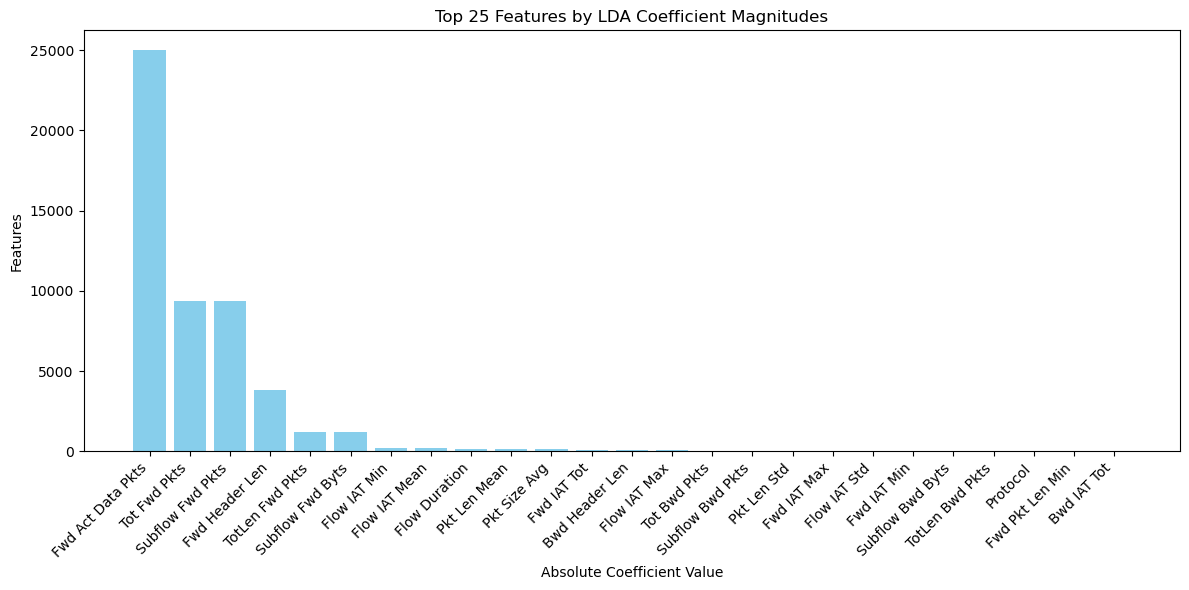

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA to reduce dimensions
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

# Print the transformed feature shape
print(f"LDA transformed feature shape: {X_train_lda.shape}")

# Get the LDA coefficients
lda_coefficients = lda.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lda_coefficients
})

# Sort features by absolute value of coefficients
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 25 features
top_features = feature_importance.head(25)

# Print top 25 features
print("Top 25 features by LDA coefficients:")
print(top_features[['Feature', 'Coefficient']])

# Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Abs_Coefficient'], color='skyblue')
plt.title("Top 25 Features by LDA Coefficient Magnitudes")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
